In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Cardiovascular Datasets
## This dataset from kaggle: https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset

In [2]:
df = pd.read_csv('.\Cardiovascular_Disease_Dataset.csv')

In [3]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


# Data Exploration

In [5]:
print("duplicate values:", df.duplicated().sum())
print("missing values:", df.isnull().sum().sum())

duplicate values: 0
missing values: 0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


## Number and gender distribution of heart disease

1    580
0    420
Name: target, dtype: int64


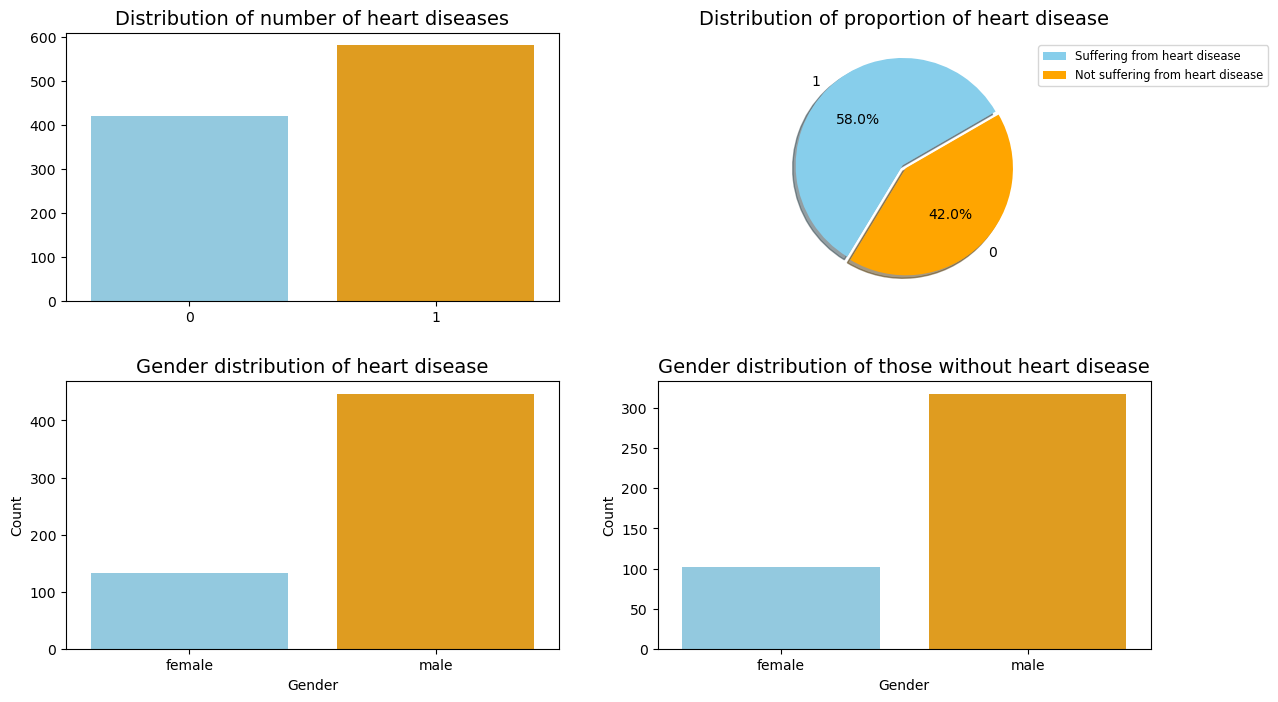

In [7]:
plt.figure(figsize=(14, 8))

# Distribution chart of the number of heart diseases (bar chart and pie chart)
cols = ["skyblue", "orange"]
plt.subplot(2, 2, 1)
sns.barplot(x=df["target"].value_counts().index, y=df["target"].value_counts(), palette=cols)
plt.ylabel("")
plt.title("Distribution of number of heart diseases", fontsize=14)
plt.subplot(2, 2, 2)
plt.pie(x=df["target"].value_counts(), labels=df["target"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.1f%%', colors=cols)
plt.legend(labels=["Suffering from heart disease", "Not suffering from heart disease"], loc=(1, 0.8), fontsize="small")
plt.title("Distribution of proportion of heart disease", fontsize=14)

# Gender distribution chart of those who suffer from heart disease
plt.subplot(2, 2, 3)
sns.countplot(x='gender', data=df[df['target'] == 1], palette=cols)
plt.title("Gender distribution of heart disease", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["female", "male"])

# Gender distribution chart of those who do not suffer from heart disease
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df[df['target'] == 0], palette=cols)
plt.title("Gender distribution of those without heart disease", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["female", "male"])

plt.subplots_adjust(hspace=0.3)
print(df.target.value_counts())
plt.show()

## Numeric variable distribution chart

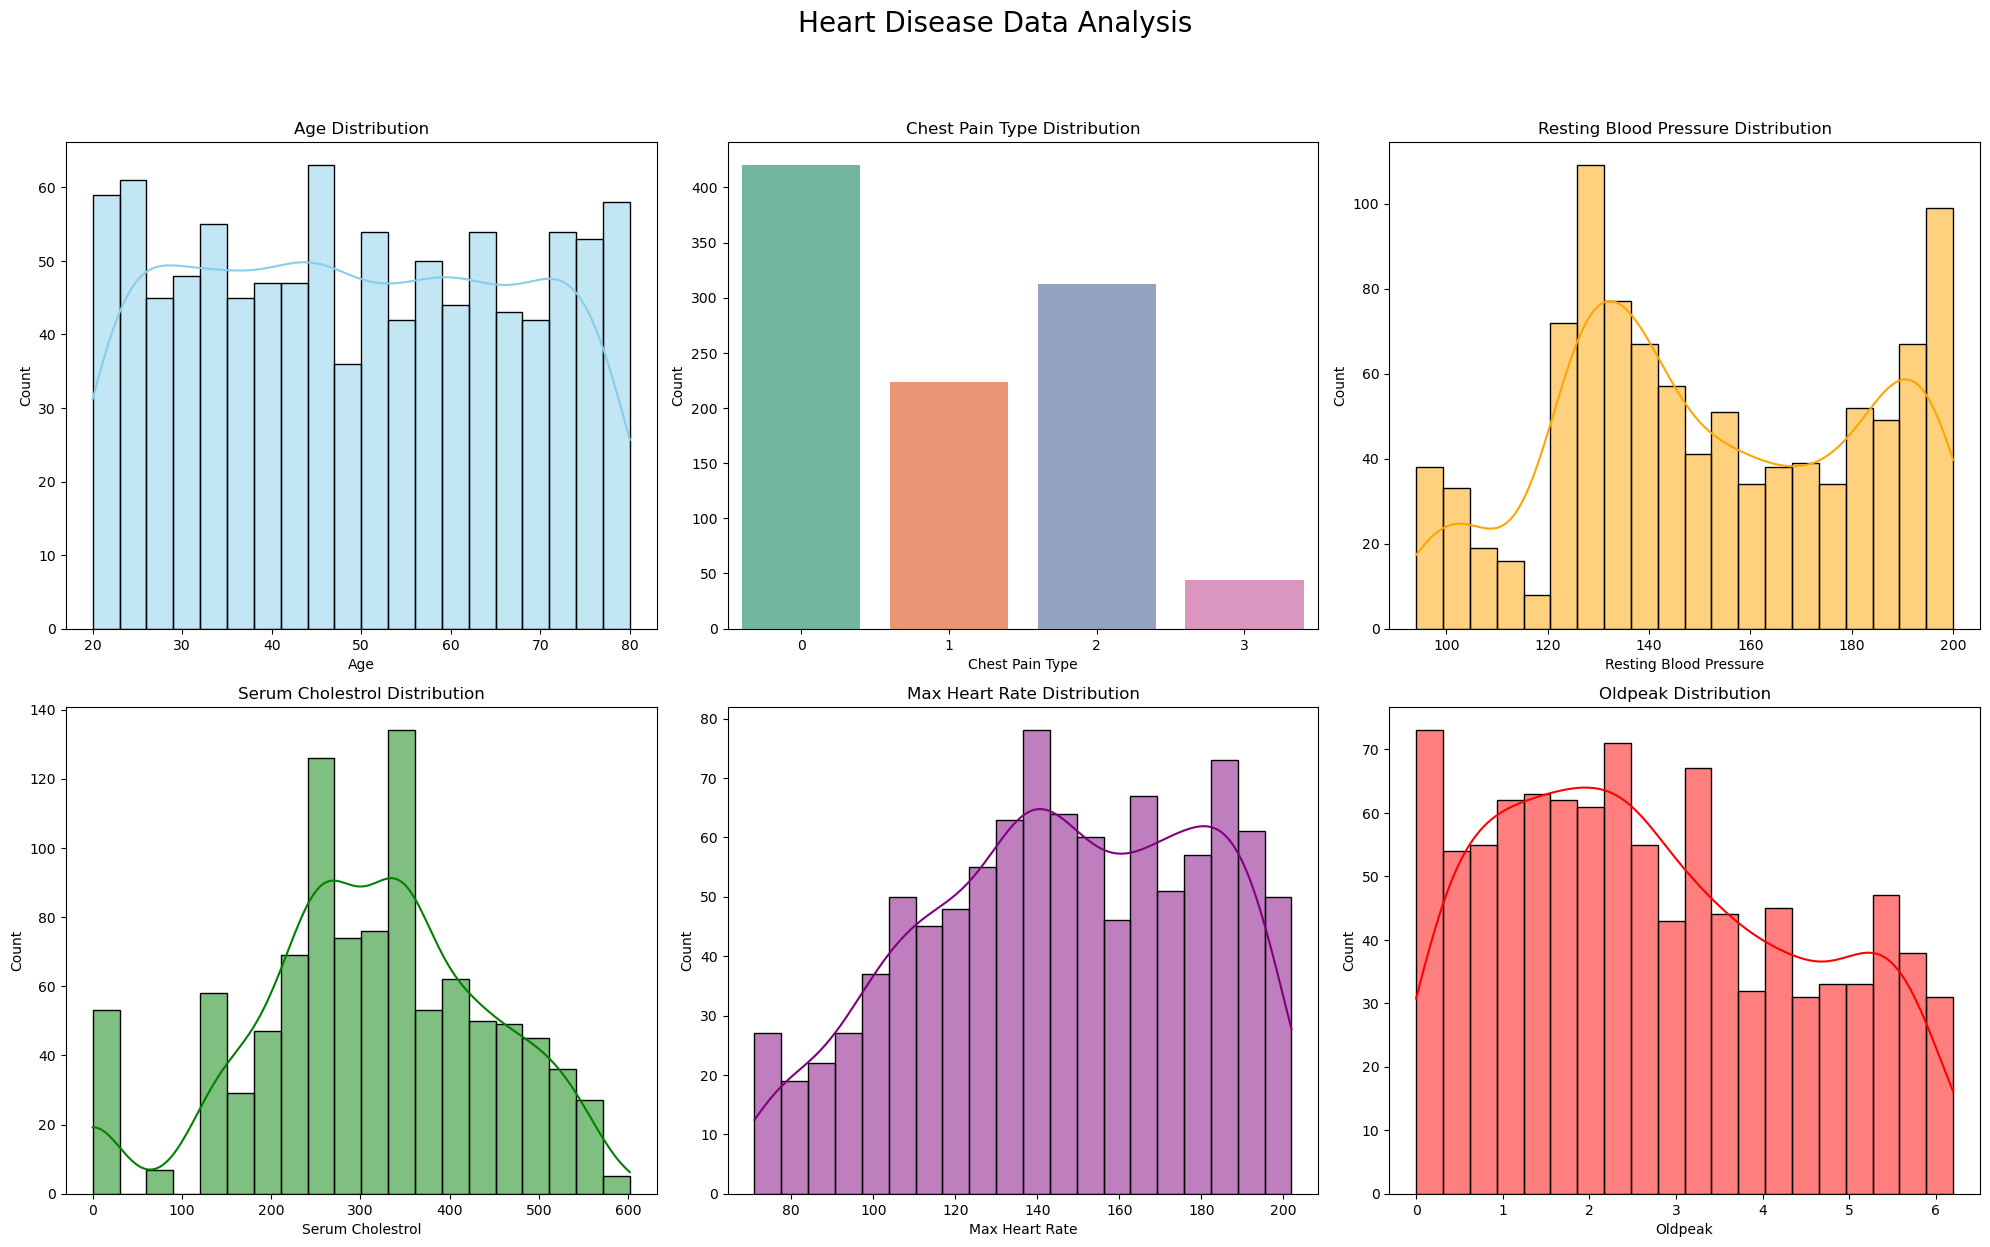

In [8]:
plt.figure(figsize=(20, 18))

# Age distribution chart
plt.subplot(3, 3, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Chest Pain Type Distribution chart
plt.subplot(3, 3, 2)
sns.countplot(x='chestpain', data=df, palette='Set2')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Resting Blood Pressure Distribution chart
plt.subplot(3, 3, 3)
sns.histplot(df['restingBP'], bins=20, kde=True, color='orange')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')

# Serum Cholestrol Distribution chart
plt.subplot(3, 3, 4)
sns.histplot(df['serumcholestrol'], bins=20, kde=True, color='green')
plt.title('Serum Cholestrol Distribution')
plt.xlabel('Serum Cholestrol')
plt.ylabel('Count')

# Max Heart Rate Distribution chart
plt.subplot(3, 3, 5)
sns.histplot(df['maxheartrate'], bins=20, kde=True, color='purple')
plt.title('Max Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Count')

# Oldpeak Distribution chart
plt.subplot(3, 3, 6)
sns.histplot(df['oldpeak'], bins=20, kde=True, color='red')
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Count')

plt.suptitle("Heart Disease Data Analysis", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Draw a heatmap showing correlations between features

In [9]:
df.drop(columns='patientid', inplace=True)

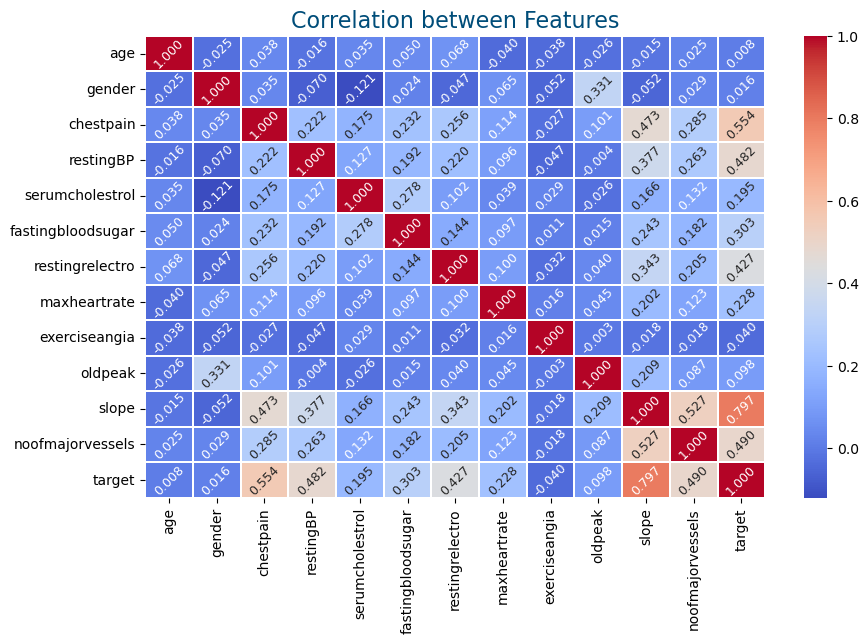

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), linewidths=0.05, annot=True,
            annot_kws={'size': 9, 'rotation': 45}, fmt='.3f', cmap="coolwarm")
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16, color="#004d79")
plt.show()

# Model Creation

In [11]:
X=df.drop(columns='target')
y=df['target']

In [12]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Recursive Feature Extraction (RFE) + Extra Trees (ET)

In [14]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [15]:
rfe = RFE(estimator=etc, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=ExtraTreesClassifier(random_state=42), n_features_to_select=10)

In [16]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [17]:
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [False  True  True  True  True  True  True  True False  True  True  True]
Feature ranking: [2 1 1 1 1 1 1 1 3 1 1 1]


In [18]:
etc.fit(X_train_rfe, y_train)
y_pred = etc.predict(X_test_rfe)

In [19]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy1:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        83
           1       0.98      1.00      0.99       117

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



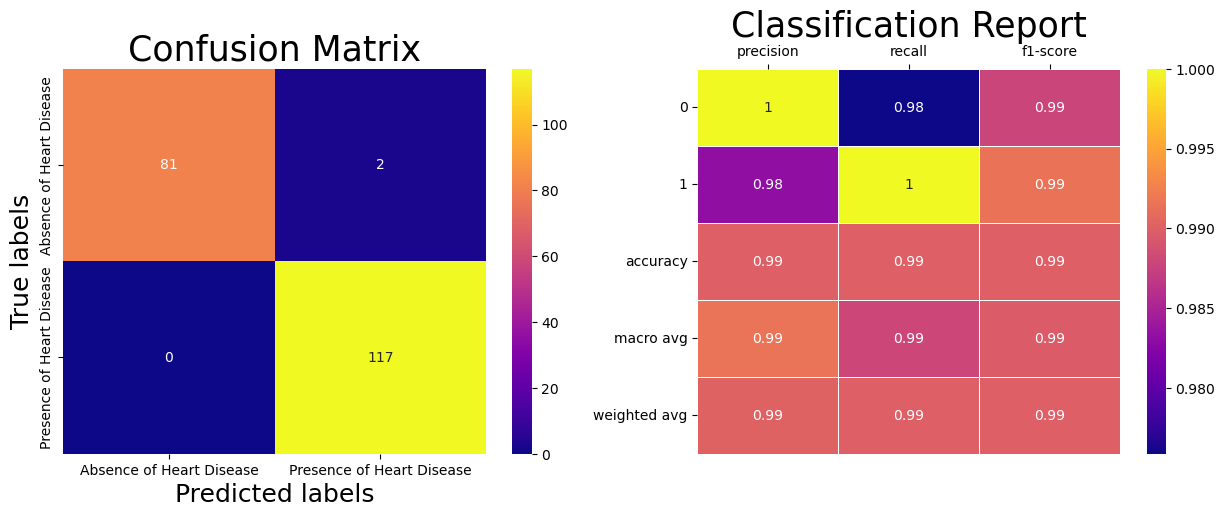

In [20]:
clf_plot(y_pred)

## Recursive Feature Extraction (RFE) + Gaussian Naive Bayes (GNB)

In [21]:
# Initialize Random Forest Classifier for RFE (as GNB doesn't support feature importance)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [23]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [24]:
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [ True  True  True  True  True False  True  True False  True  True  True]
Feature ranking: [1 1 1 1 1 2 1 1 3 1 1 1]


In [25]:
gnb = GaussianNB()
gnb.fit(X_train_rfe, y_train)
y_pred = gnb.predict(X_test_rfe)

In [26]:
accuracy2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy2:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.98      0.98      0.98       117

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



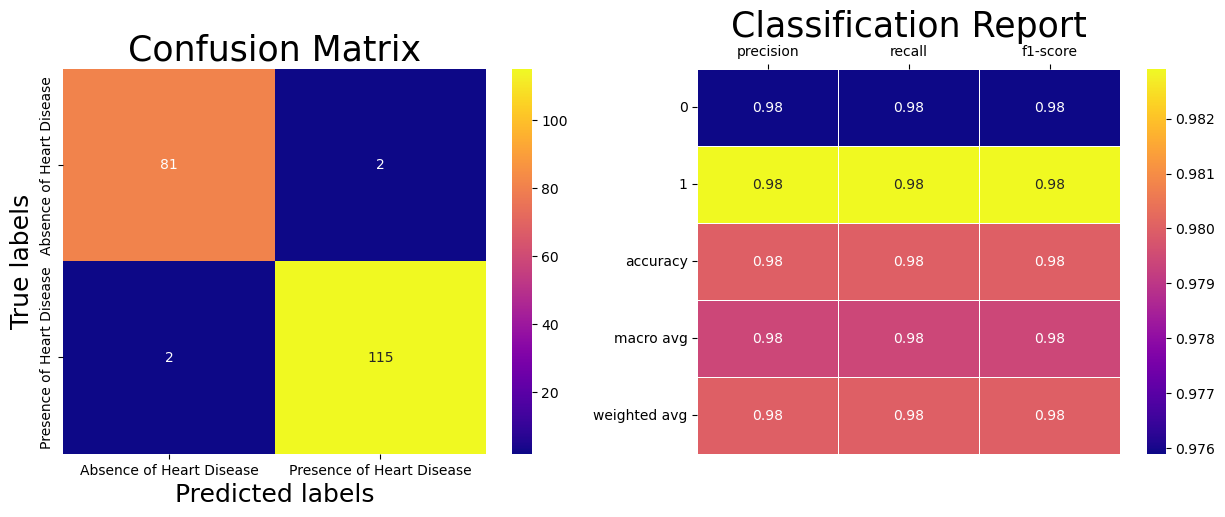

In [27]:
clf_plot(y_pred)

## Recursive Feature Extraction (RFE) + AdaBoost

In [28]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

In [29]:
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [30]:
rfe = RFE(estimator=ada, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                       random_state=42),
                                 random_state=42),
    n_features_to_select=10)

In [31]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [32]:
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [ True  True  True  True  True  True False  True False  True  True  True]
Feature ranking: [1 1 1 1 1 1 2 1 3 1 1 1]


In [33]:
ada.fit(X_train_rfe, y_train)
y_pred = ada.predict(X_test_rfe)

In [34]:
accuracy3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy3:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200



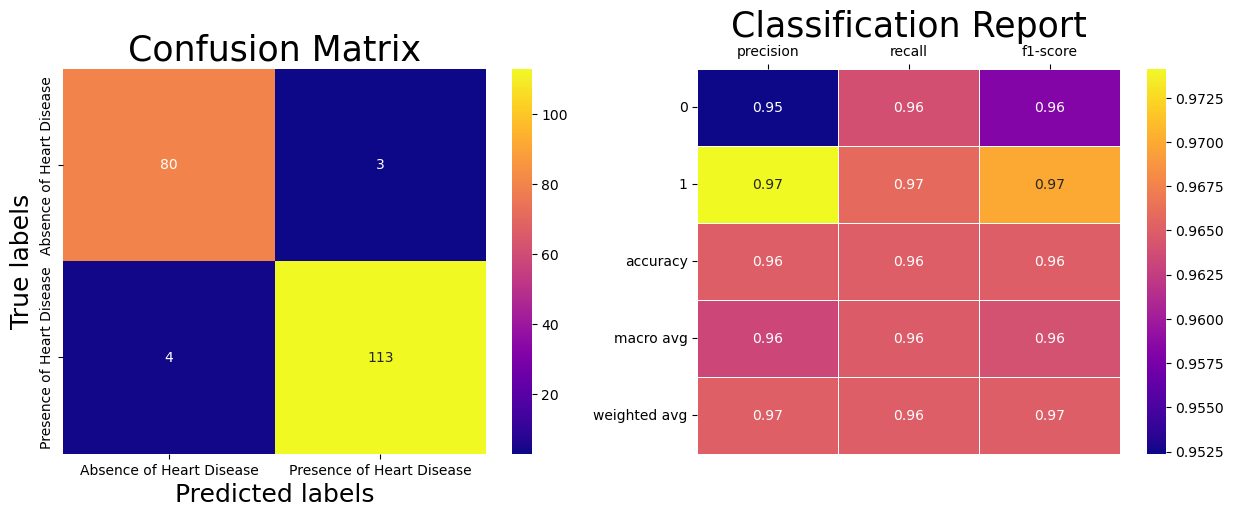

In [35]:
clf_plot(y_pred)

## Principle Component Analysis(PCA) + Logistic Regression(LR)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
pca = PCA(n_components=10)

In [38]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.21461157 0.12031135 0.08924169 0.08794203 0.07946071 0.07786503
 0.0683241  0.06523807 0.05943592 0.05576638]


In [40]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

In [41]:
accuracy4 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy4:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



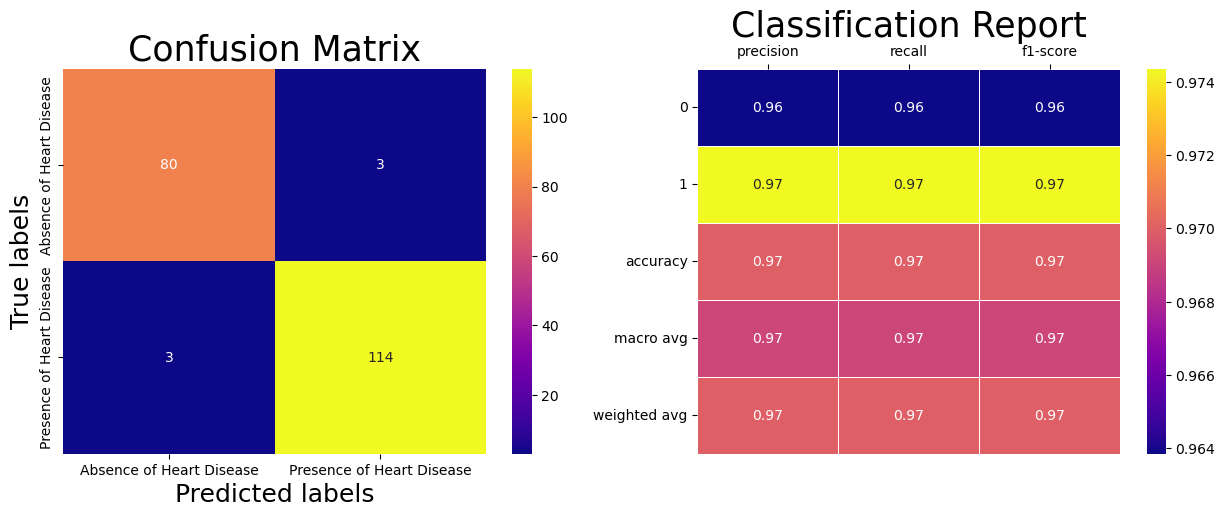

In [42]:
clf_plot(y_pred)

## Principle Component Analysis(PCA) + Decision Tree(DT)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
pca = PCA(n_components=10)

In [45]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [46]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.21461157 0.12031135 0.08924169 0.08794203 0.07946071 0.07786503
 0.0683241  0.06523807 0.05943592 0.05576638]


In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
y_pred = dt.predict(X_test_pca)

In [48]:
accuracy5 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy5:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        83
           1       0.95      0.91      0.93       117

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



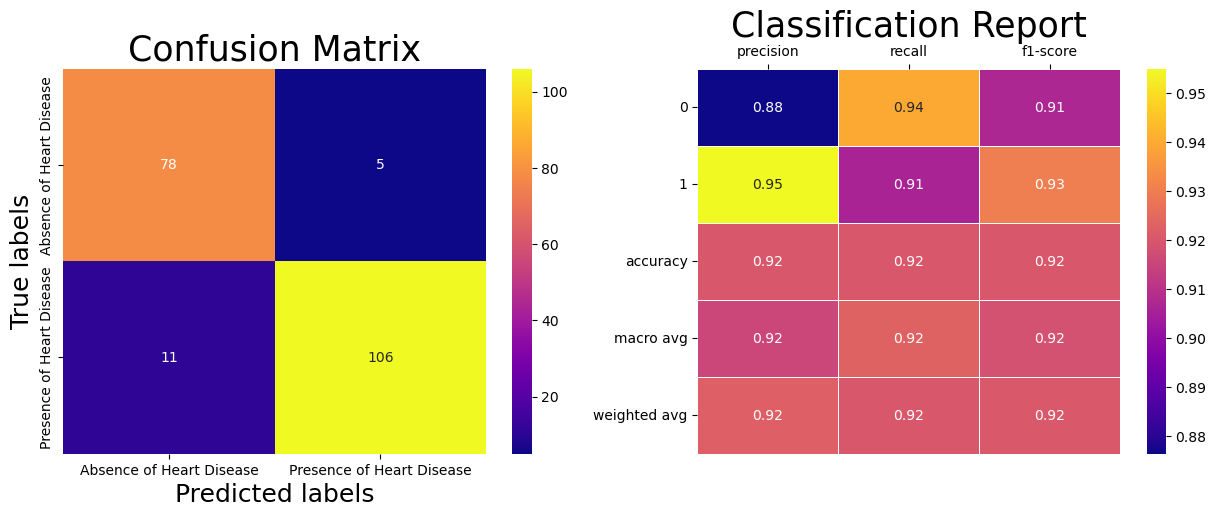

In [49]:
clf_plot(y_pred)

## RNN

In [50]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [51]:
# Initialize the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4499 - loss: 0.7415 - val_accuracy: 0.6500 - val_loss: 0.6257
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.5828 - val_accuracy: 0.8250 - val_loss: 0.5023
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - loss: 0.4588 - val_accuracy: 0.8687 - val_loss: 0.4204
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9236 - loss: 0.3627 - val_accuracy: 0.8687 - val_loss: 0.3657
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9325 - loss: 0.3197 - val_accuracy: 0.8750 - val_loss: 0.3266
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.2728 - val_accuracy: 0.8875 - val_loss: 0.2985
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9136 - loss: 0.2559 - val_accuracy: 0.8875 - val_loss: 0.2789
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9410 - loss: 0.2183 - val_accuracy: 0.8875 - val_loss

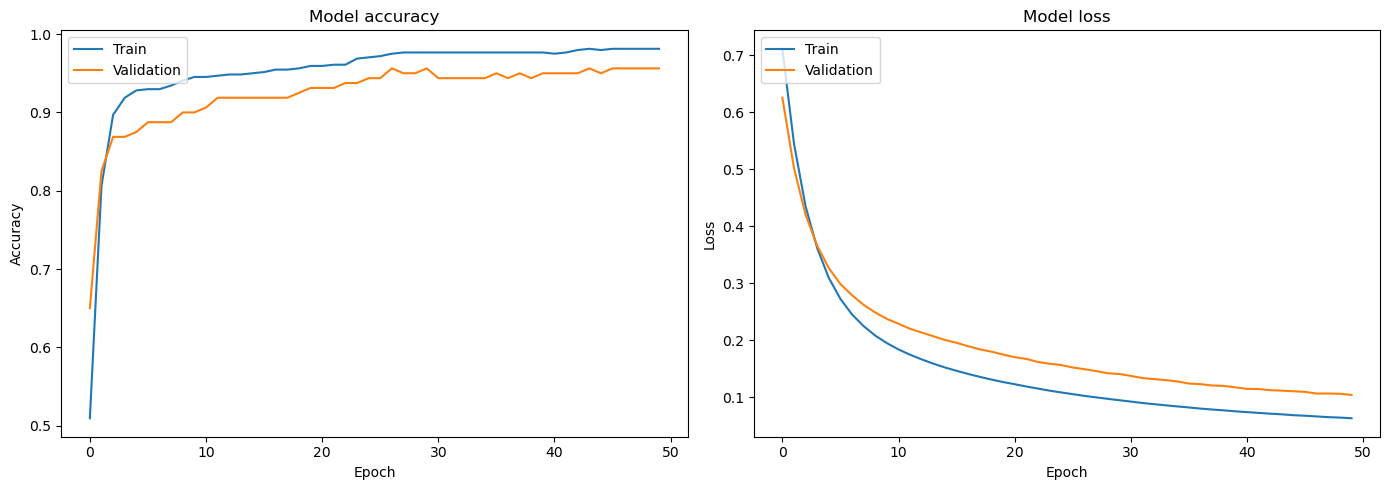

In [52]:
plt.figure(figsize=(14, 5))

# Model training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Model training and validation losses
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [53]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

# Calculate accuracy
accuracy6 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy6:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



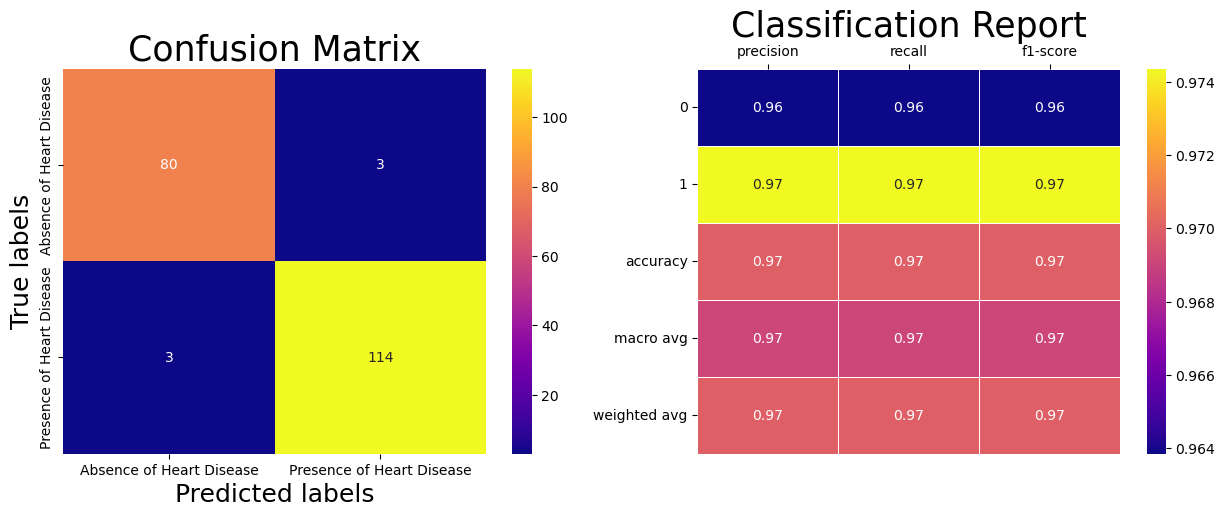

In [54]:
clf_plot(y_pred)

# Model Accuracy Comparison

In [55]:
result1 = pd.DataFrame({
    'Algorithm' : ['RFE+ET', 'RFE+GNB','RFE+AdaBoost','PCA+LR','PCA+DT','RNN'],
    'Accuracy' : [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]
})

result1.sort_values(by='Accuracy', inplace=True)

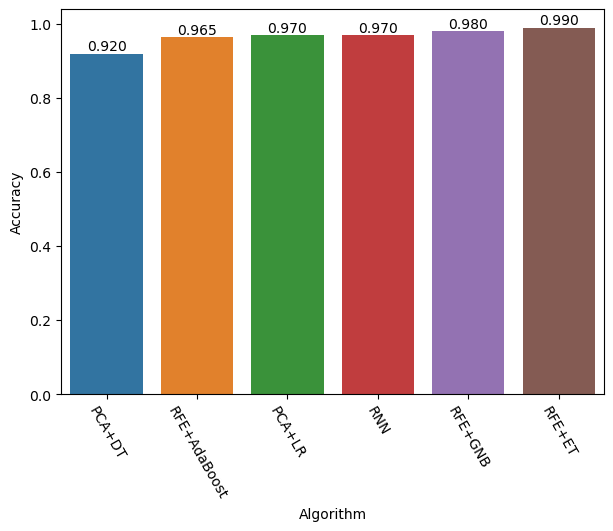

In [56]:
fig2,ax = plt.subplots(1, 1, figsize=(7,5))
sns.barplot(x='Algorithm', y='Accuracy', data=result1)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result1.Algorithm, rotation=300)
plt.show()